<a href="https://colab.research.google.com/github/RodrigoPretes/dslist/blob/main/Segundo_Trabalho_Pr%C3%A1tico_sobre_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras
import tensorflow as tf
print(tf.__version__)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  # Adicionei a importação correta para plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



2.13.0


In [ ]:
# Entrada de dados
X = np.array(
 [
 ['sol', 'alta', 'alta', 'não'],
 ['sol', 'alta', 'alta', 'sim'],
 ['nublado', 'alta', 'alta', 'não'],
 ['chuva', 'alta', 'alta', 'não'],
 ['chuva', 'baixa', 'normal', 'não'],
 ['chuva', 'baixa', 'normal', 'sim'],
 ['nublado', 'baixa', 'normal', 'sim'],
 ['sol', 'suave', 'alta', 'não'],
 ['sol', 'baixa', 'normal', 'não'],
 ['chuva', 'suave', 'normal', 'não'],
 ['sol', 'suave', 'normal', 'sim'],
 ['nublado', 'suave', 'alta', 'sim'],
 ['nublado', 'alta', 'normal', 'não'],
 ['chuva', 'suave', 'alta', 'sim']
 ]
)
Y = np.array( [ 'não joga', 'não joga', 'joga', 'joga',
'joga', 'não joga', 'joga', 'não joga', 'joga', 'joga', 'joga',
'joga', 'joga', 'não joga' ] )
X1 = pd.DataFrame(X, dtype=str, columns=['Céu',
'Temperatura', 'Umidade', 'Vento'])
XX = pd.get_dummies(data=X1, columns=['Céu',
'Temperatura', 'Umidade', 'Vento'])
XX
Y1 = pd.DataFrame(Y, dtype=str, columns=['Classe'])
YY = pd.get_dummies(data=Y1, columns=['Classe'])
YY

,Classe_joga,Classe_não joga
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,1,0


In [ ]:
# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy',
max_depth=2)

In [ ]:
# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_
arvore.classes_
arvore.score(XX, YY)


0.8571428571428571

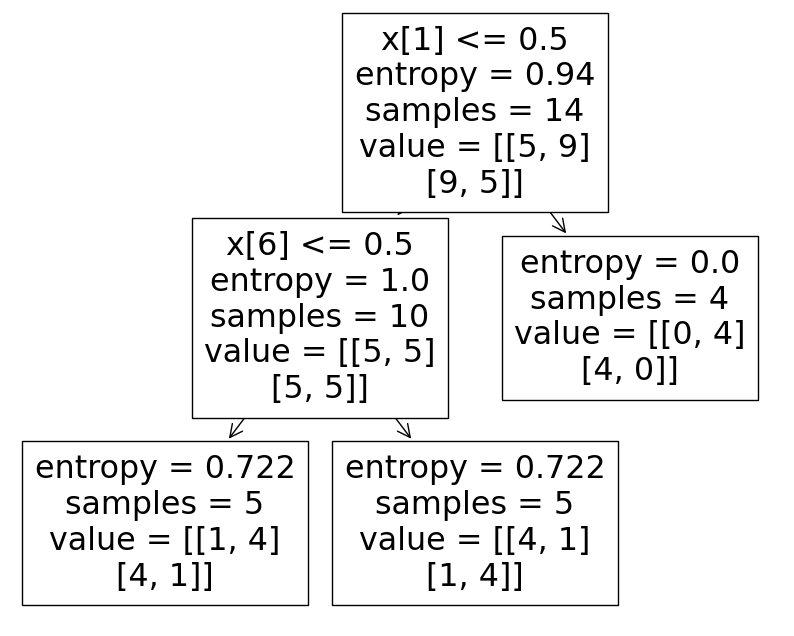

[Text(0.6, 0.8333333333333334, 'Céu_nublado <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [[5, 9]\n[9, 5]]'),
 Text(0.4, 0.5, 'Umidade_alta <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [[5, 5]\n[5, 5]]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [[1, 4]\n[4, 1]]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [[4, 1]\n[1, 4]]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [[0, 4]\n[4, 0]]')]

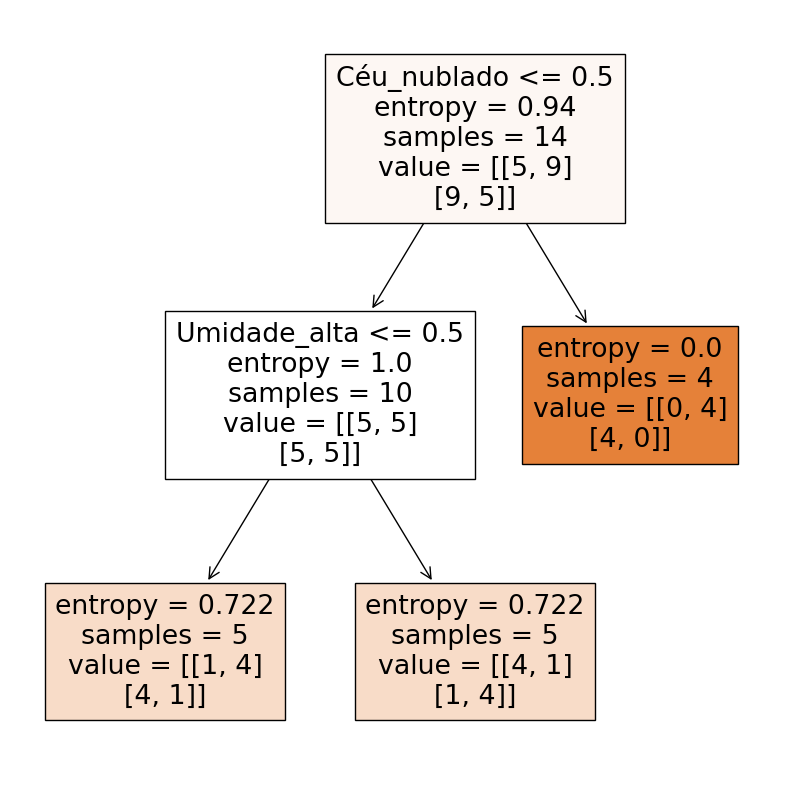

In [ ]:
# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()
# Visualizando essa árvore 2
figura, eixos = plt.subplots(nrows=1, ncols=1,
figsize=(10,10))
tree.plot_tree(arvore, feature_names=XX.columns,
class_names = ['Não Joga', 'Joga'], filled=True)

In [ ]:
# Regra Se- Então
from sklearn.tree import export_text
XX.columns
r = export_text(arvore, feature_names=['Céu_chuva',
'Céu_nublado', 'Céu_sol', 'Temperatura_alta',
 'Temperatura_baixa', 'Temperatura_suave',
'Umidade_alta',
 'Umidade_normal', 'Vento_não', 'Vento_sim'])
print(r)

|--- Céu_nublado <= 0.50
|   |--- Umidade_alta <= 0.50
|   |   |--- class: 1
|   |--- Umidade_alta >  0.50
|   |   |--- class: 0
|--- Céu_nublado >  0.50
|   |--- class: 1



In [ ]:
# Entrada de dados
X = np.array(
 [
 ['medio', 'senior', 'baixo', 'sim'],
 ['medio', 'senior', 'baixo', 'não'],
 ['baixo', 'senior', 'baixo', 'sim'],
 ['alto', 'media', 'baixo', 'sim'],
 ['alto', 'jovem', 'alto', 'sim'],
 ['alto', 'jovem', 'alto', 'não'],
 ['baixo', 'jovem', 'alto', 'não'],
 ['medio', 'media', 'baixo', 'sim'],
 ['medio', 'jovem', 'alto', 'sim'],
 ['alto', 'media', 'alto', 'sim'],
 ['medio', 'media', 'alto', 'não'],
 ['baixo', 'jovem', 'baixo', 'não'],
 ['baixo', 'senior', 'alto', 'sim'],
 ['alto', 'media', 'baixo', 'não']
 ]
)
Y = np.array( [ 'não', 'não', 'sim', 'sim',
'sim', 'não', 'sim', 'não', 'sim', 'sim', 'sim',
'sim', 'sim', 'não' ] )
X1 = pd.DataFrame(X, dtype=str, columns=['Montante',
'Idade', 'Salário', 'Conta'])
XX = pd.get_dummies(data=X1, columns=['Montante',
'Idade', 'Salário', 'Conta'])
XX
Y1 = pd.DataFrame(Y, dtype=str, columns=['Empréstimo'])
YY = pd.get_dummies(data=Y1, columns=['Empréstimo'])
YY

,Empréstimo_não,Empréstimo_sim
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [ ]:
# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy',
max_depth=2)

In [ ]:
# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_
arvore.classes_
arvore.score(XX, YY)

0.8571428571428571

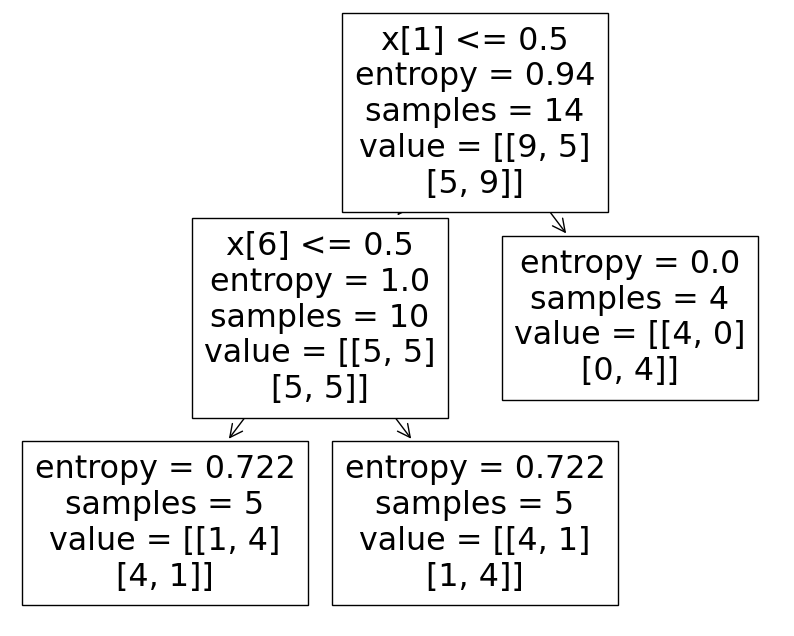

In [ ]:
# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()

[Text(0.6, 0.8333333333333334, 'Montante_baixo <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [[9, 5]\n[5, 9]]'),
 Text(0.4, 0.5, 'Salário_alto <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [[5, 5]\n[5, 5]]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [[1, 4]\n[4, 1]]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [[4, 1]\n[1, 4]]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [[4, 0]\n[0, 4]]')]

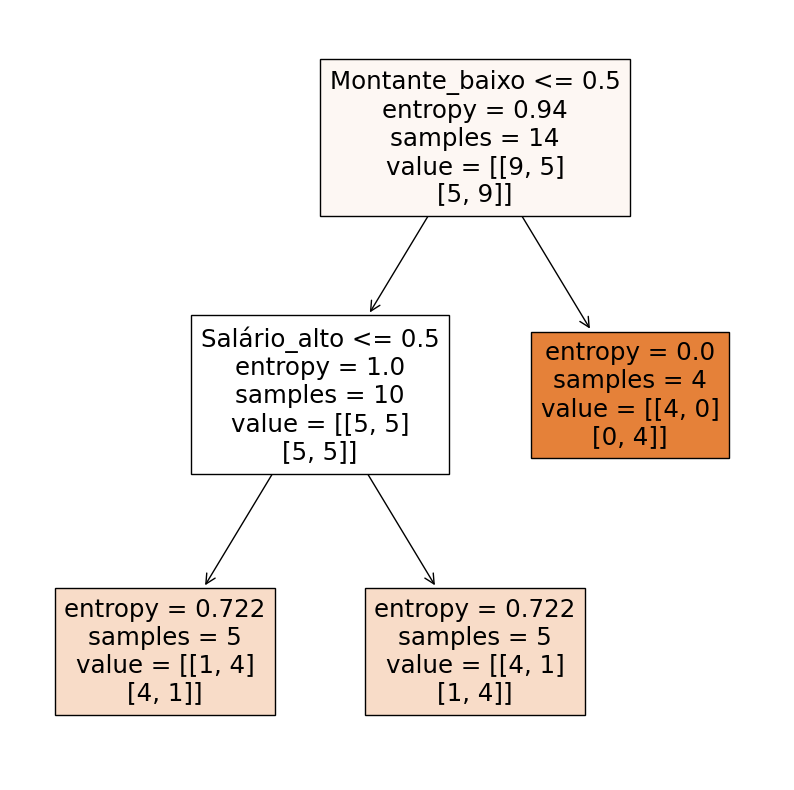

In [ ]:
# Visualizando essa árvore 2
figura, eixos = plt.subplots(nrows=1, ncols=1,
figsize=(10,10))
tree.plot_tree(arvore, feature_names=XX.columns,
class_names = ['Não', 'Sim'], filled=True)

In [ ]:
# Regra Se- Então
from sklearn.tree import export_text
XX.columns
r = export_text(arvore, feature_names=['Montante_medio',
'Montante_baixo', 'Montante_alto', 'Idade_senior',
 'Idade_media', 'Idade_jovem',
'Salario_baixo',
 'Salario_alto', 'Emprestimo_não', 'Emprestimo_sim'])
print(r)

|--- Montante_baixo <= 0.50
|   |--- Salario_baixo <= 0.50
|   |   |--- class: 1
|   |--- Salario_baixo >  0.50
|   |   |--- class: 0
|--- Montante_baixo >  0.50
|   |--- class: 0



In [2]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras
import tensorflow as tf
print(tf.__version__)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  # Adicionei a importação correta para plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


2.13.0


In [3]:
# Entrada de dados
X = np.array(
 [
 ['sol', '85', '85', 'não'],
 ['sol', '80', '90', 'sim'],
 ['nublado', '83', '78', 'não'],
 ['chuva', '70', '96', 'não'],
 ['chuva', '68', '80', 'não'],
 ['chuva', '65', '70', 'sim'],
 ['nublado', '64', '65', 'sim'],
 ['sol', '72', '95', 'não'],
 ['sol', '69', '70', 'não'],
 ['chuva', '75', '80', 'não'],
 ['sol', '75', '70', 'sim'],
 ['nublado', '72', '90', 'sim'],
 ['nublado', '81', '75', 'não'],
 ['chuva', '71', '80', 'sim']
 ]
)
Y = np.array( [ 'não joga', 'não joga', 'joga', 'joga',
'joga', 'não joga', 'joga', 'não joga', 'joga', 'joga', 'joga',
'joga', 'joga', 'não joga' ] )
X1 = pd.DataFrame(X, dtype=str, columns=['Céu',
'Temperatura', 'Umidade', 'Vento'])
XX = pd.get_dummies(data=X1, columns=['Céu',
'Temperatura', 'Umidade', 'Vento'])
XX
Y1 = pd.DataFrame(Y, dtype=str, columns=['Classe'])
YY = pd.get_dummies(data=Y1, columns=['Classe'])
YY

,Classe_joga,Classe_não joga
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,1,0


In [4]:
# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy',
max_depth=2)

In [5]:
# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_
arvore.classes_
arvore.score(XX, YY)

0.7857142857142857

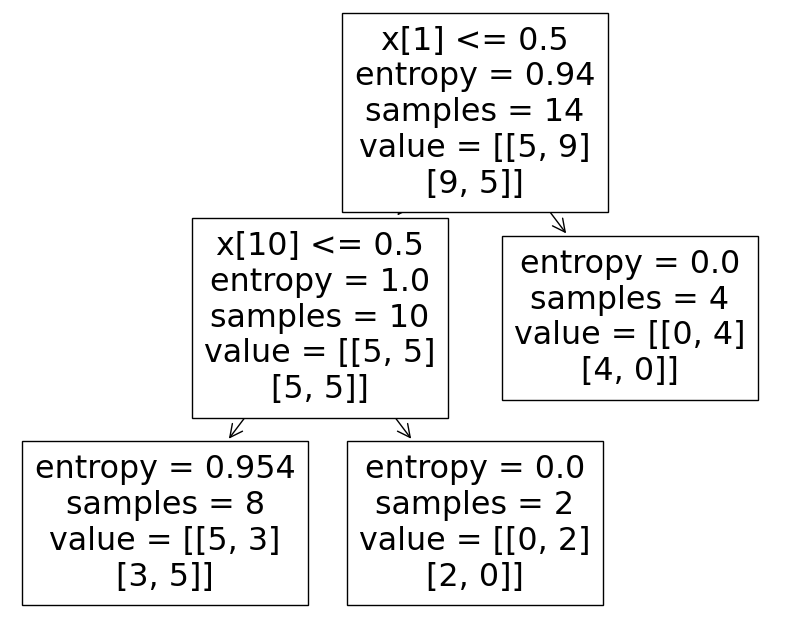

In [6]:
# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()

[Text(0.6, 0.8333333333333334, 'Céu_nublado <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [[5, 9]\n[9, 5]]'),
 Text(0.4, 0.5, 'Temperatura_75 <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [[5, 5]\n[5, 5]]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.954\nsamples = 8\nvalue = [[5, 3]\n[3, 5]]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [[0, 2]\n[2, 0]]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [[0, 4]\n[4, 0]]')]

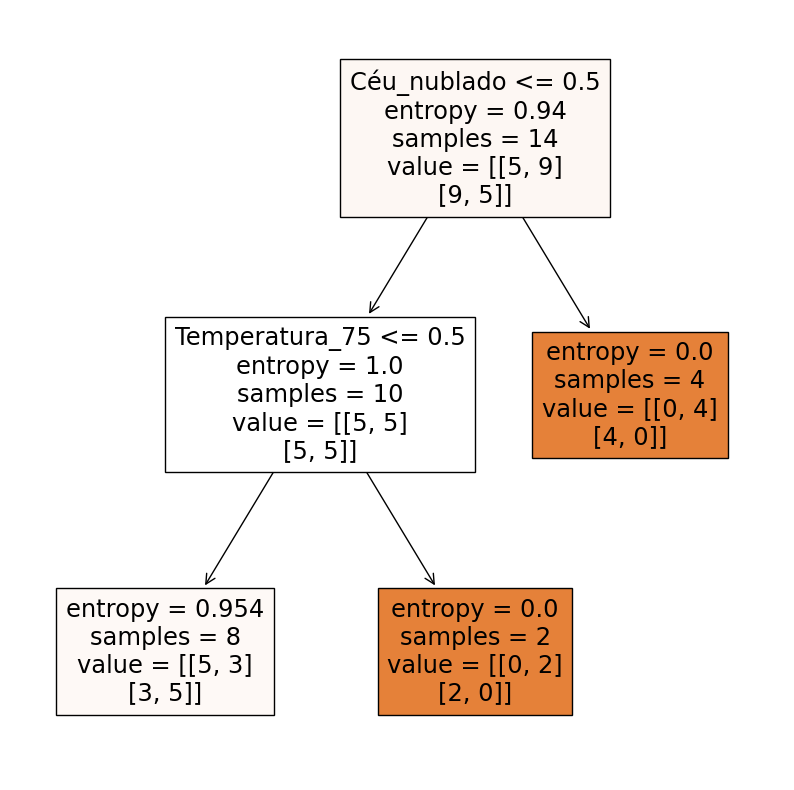

In [7]:
# Visualizando essa árvore 2
figura, eixos = plt.subplots(nrows=1, ncols=1,
figsize=(10,10))
tree.plot_tree(arvore, feature_names=XX.columns,
class_names = ['Não joga', 'Joga'], filled=True)

In [10]:
# Regra Se- Então
from sklearn.tree import export_text
XX.columns
r = export_text(arvore, feature_names=XX.columns.tolist())


print(r)

|--- Céu_nublado <= 0.50
|   |--- Temperatura_75 <= 0.50
|   |   |--- class: 0
|   |--- Temperatura_75 >  0.50
|   |   |--- class: 1
|--- Céu_nublado >  0.50
|   |--- class: 1

